In [1]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library

#### Analyzing Movies Dataset

In [2]:
movies= pd.read_csv('movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Verifying if all movies are unique
unique_movies = movies['movieId'].unique().tolist()
print(movies.shape)
print(len(unique_movies))

(27278, 3)
27278


#### Analyzing ratings dataset

In [5]:
ratings=pd.read_csv('ratings.csv',sep=',')

In [6]:
ratings['rating'].min() 

0.5

In [7]:
ratings['rating'].max()

5.0

#### Analyzing tags dataset

In [8]:
tags=pd.read_csv('tags.csv',sep=',')

In [9]:
unique_tags=tags['tag'].unique().tolist()
len(unique_tags)

38644

#### Data Cleaning

In [10]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [13]:
tags=tags.dropna()

In [14]:
unique_tags=tags['tag'].unique().tolist()
len(unique_tags)

38643

In [15]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,1048575.0,3.527086e+03,2.018424e+03,1.0,1813.0,3.540000e+03,5.233000e+03,7.120000e+03
movieId,1048575.0,8.648988e+03,1.910014e+04,1.0,903.0,2.143000e+03,4.641000e+03,1.306420e+05
rating,1048575.0,3.529272e+00,1.051919e+00,0.5,3.0,4.000000e+00,4.000000e+00,5.000000e+00
timestamp,1048575.0,1.096036e+09,1.594899e+08,825499934.0,965838177.0,1.099263e+09,1.217407e+09,1.427764e+09


In [16]:
tags.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,465548.0,6.871068e+04,4.187741e+04,1.800000e+01,2.878000e+04,7.020100e+04,1.072560e+05,1.384720e+05
movieId,465548.0,3.262839e+04,3.608056e+04,1.000000e+00,2.571000e+03,7.373000e+03,6.224500e+04,1.312580e+05
timestamp,465548.0,1.298714e+09,7.920819e+07,1.135429e+09,1.245008e+09,1.302297e+09,1.366218e+09,1.427771e+09


In [17]:
del ratings['timestamp']
del tags['timestamp']

#### Data Analysis

In [18]:
movies['year'] =movies['title'].str.extract('.*\((.*)\).*',expand = False)

In [19]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [20]:
movies['title']=movies['title'].replace(r'\(.*', '', regex=True)

In [21]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [22]:
unique_years=movies['year'].unique().tolist()
print(unique_years)

['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993', '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978', '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927', '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923', '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915', '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008', '2009', '1912', '2010', 'Das Millionenspiel', '1913', '2011', '1898', '1899', 'Bicicleta, cullera, poma', '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896', '1983)', '2014', '2009– ', '2007-', '1975-1979',

In [23]:
print(movies.loc[movies['year'] == 'Das Millionenspiel'])

       movieId                title                        genres  \
15646    79607  Millions Game, The   Action|Drama|Sci-Fi|Thriller   

                     year  
15646  Das Millionenspiel  


In [24]:
print(movies.loc[movies['year'] == 'Bicicleta, cullera, poma'])

       movieId                   title       genres                      year
17341    87442  Bicycle, Spoon, Apple   Documentary  Bicicleta, cullera, poma


In [25]:
print(movies.loc[movies['year'] == '1975-1979'])

       movieId           title  genres       year
22679   108583  Fawlty Towers   Comedy  1975-1979


In [26]:
movies['year']=movies['year'].replace(r'\).*', '', regex=True)

In [27]:
movies=movies.drop(movies.index[[15646, 17341,22679]])
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [28]:
movies['year']=movies['year'].replace(r'\–.*', '', regex=True)

In [29]:
movies['year']=movies['year'].replace(r'\-.*', '', regex=True)

In [30]:
unique_years=movies['year'].unique().tolist()
print(unique_years)

['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993', '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978', '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927', '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923', '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915', '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898', '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013', '1896', '2014', '1895', '2015', '1900', '1905', '1891']


In [31]:
movies.isnull().sum()

movieId     0
title       0
genres      0
year       17
dtype: int64

In [32]:
movies = movies.dropna()
movies.isnull().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [33]:
#Converting the year column from str to int
movies['year'] = pd.to_numeric(movies['year'])

In [34]:
movies['year'].min()

1891

In [35]:
movies['year'].max()

2015

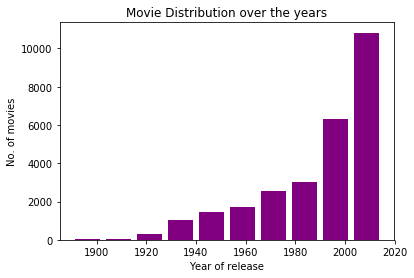

In [36]:
years = movies['year'].tolist()
# setting the ranges and no. of intervals 
range = (1890, 2015) 
bins = 10  
  
# plotting a histogram 
plt.hist(years, bins, range, color = 'purple', 
        histtype = 'bar', rwidth = 0.8) 
  
# x-axis label 
plt.xlabel('Year of release') 
# frequency label 
plt.ylabel('No. of movies') 
# plot title 
plt.title('Movie Distribution over the years') 
  
# function to show the plot 
plt.show() 

In [37]:
movie_ratings=movies.merge(ratings,on = 'movieId',how = 'inner')
movie_ratings.tail(10)

,movieId,title,genres,year,userId,rating
1048550,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,3289,3.5
1048551,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,5832,3.0
1048552,129707,The Lazarus Effect,Horror|Thriller,2015,3453,0.5
1048553,130052,Clown,Drama|Horror,2014,3858,1.0
1048554,130073,Cinderella,Adventure|Children|Drama|Sci-Fi,2015,4450,2.5
1048555,130219,The Dark Knight,Action|Crime|Drama|Thriller,2011,1339,4.5
1048556,130462,The Boy,(no genres listed),2015,5731,4.0
1048557,130490,Insurgent,Action|Romance|Sci-Fi,2015,2423,1.0
1048558,130490,Insurgent,Action|Romance|Sci-Fi,2015,3397,3.5
1048559,130642,Backcountry,Drama|Horror|Thriller,2014,3858,3.0


In [38]:
most_rated = movie_ratings.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Pulp Fiction                                       3498
Forrest Gump                                       3476
Silence of the Lambs, The                          3247
Shawshank Redemption, The                          3216
Jurassic Park                                      3129
Star Wars: Episode IV - A New Hope                 2874
Braveheart                                         2799
Terminator 2: Judgment Day                         2711
Matrix, The                                        2705
Schindler's List                                   2598
Fugitive, The                                      2570
Toy Story                                          2569
Independence Day                                   2546
Apollo 13                                          2512
Usual Suspects, The                                2490
Star Wars: Episode VI - Return of the Jedi         2480
Batman                                             2440
Star Wars: Episode V - The Empire Strikes 

In [39]:
#Extracting unique genres from genre list
genres=[]
for x in movies['genres']:
    temp=[]
    temp=x.split('|')
    for y in temp:
        if(y not in genres):
            genres.append(y)
print(genres)  
print(len(genres))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']
20


In [40]:
movies = movies.replace(to_replace ="(no genres listed)", value ="Unknown Genre") 

In [41]:
movie_ratings.tail(10)

,movieId,title,genres,year,userId,rating
1048550,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,3289,3.5
1048551,129428,The Second Best Exotic Marigold Hotel,Comedy|Drama,2015,5832,3.0
1048552,129707,The Lazarus Effect,Horror|Thriller,2015,3453,0.5
1048553,130052,Clown,Drama|Horror,2014,3858,1.0
1048554,130073,Cinderella,Adventure|Children|Drama|Sci-Fi,2015,4450,2.5
1048555,130219,The Dark Knight,Action|Crime|Drama|Thriller,2011,1339,4.5
1048556,130462,The Boy,(no genres listed),2015,5731,4.0
1048557,130490,Insurgent,Action|Romance|Sci-Fi,2015,2423,1.0
1048558,130490,Insurgent,Action|Romance|Sci-Fi,2015,3397,3.5
1048559,130642,Backcountry,Drama|Horror|Thriller,2014,3858,3.0


#### Separating into genres

In [42]:
action_movies = movies['genres'].str.contains('Action')
adventure_movies = movies['genres'].str.contains('Adventure')
animation_movies = movies['genres'].str.contains('Animation')
children_movies = movies['genres'].str.contains('Children')
comedy_movies = movies['genres'].str.contains('Comedy')
crime_movies = movies['genres'].str.contains('Crime')
documentary_movies = movies['genres'].str.contains('Documentary')
drama_movies = movies['genres'].str.contains('Drama')
fantasy_movies = movies['genres'].str.contains('Fantasy')
film_noir_movies = movies['genres'].str.contains('Film-Noir')
horror_movies = movies['genres'].str.contains('Horror')
imax_movies = movies['genres'].str.contains('IMAX')
mystery_movies = movies['genres'].str.contains('Mystery')
musical_movies = movies['genres'].str.contains('Musical')
romantic_movies = movies['genres'].str.contains('Romance')
scifi_movies = movies['genres'].str.contains('Sci-Fi')
thriller_movies = movies['genres'].str.contains('Thriller')
unknown = movies['genres'].str.contains('Unknown Genre')
war_movies = movies['genres'].str.contains('War')
western_movies = movies['genres'].str.contains('Western')

In [43]:
action_movies = movies[action_movies]
adventure_movies = movies[adventure_movies]
animation_movies = movies[animation_movies]
children_movies = movies[children_movies]
comedy_movies = movies[comedy_movies]
crime_movies = movies[crime_movies]
documentary_movies = movies[documentary_movies]
drama_movies = movies[drama_movies]
fantasy_movies = movies[fantasy_movies]
film_noir_movies = movies[film_noir_movies]
horror_movies = movies[horror_movies]
imax_movies = movies[imax_movies]
mystery_movies = movies[mystery_movies]
musical_movies = movies[musical_movies]
romantic_movies = movies[romantic_movies]
scifi_movies = movies[scifi_movies]
thriller_movies = movies[thriller_movies]
war_movies = movies[war_movies]
western_movies = movies[western_movies]
unknown = movies[unknown]

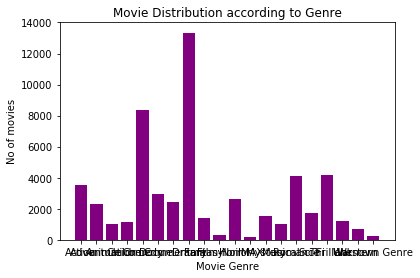

In [44]:
from matplotlib.pyplot import figure

genre = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
  
# heights of bars 
height = [len(action_movies.index), len(adventure_movies.index), len(animation_movies.index), len(children_movies.index), 
         len(comedy_movies.index), len(crime_movies.index), len(documentary_movies.index), len(drama_movies.index), 
         len(fantasy_movies.index), len(film_noir_movies.index), len(horror_movies.index), len(imax_movies.index), 
         len(mystery_movies.index), len(musical_movies.index), len(romantic_movies.index), len(scifi_movies.index), 
         len(thriller_movies.index), len(war_movies.index), len(western_movies.index), len(unknown.index)] 
  
# labels for bars 
tick_label = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy',
             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
             'Horror', 'IMAX', 'Mystery', 'Musical', 'Romance',
             'Sci-Fi', 'Thriller', 'War', 'Western', 'Unknown Genre',] 
# plotting a bar chart 
plt.bar(genre, height, tick_label = tick_label, 
        width = 0.8, color = ['purple']) 

# naming the x-axis 
plt.xlabel('Movie Genre') 
# naming the y-axis 
plt.ylabel('No of movies') 
# plot title 
plt.title('Movie Distribution according to Genre') 
  
plt.rcParams["figure.figsize"] = [25,20]
# function to show the plot 
plt.show()

In [45]:
movie_rating = ratings.groupby(['movieId'], as_index=False)
average_movie_ratings = movie_rating.agg({'rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('rating', ascending=False).head(25)
top_25_movies

,movieId,rating
12789,95218,5.0
1607,1706,5.0
6859,7330,5.0
130,134,5.0
10461,60227,5.0
7528,8698,5.0
7519,8686,5.0
10449,60096,5.0
13548,108501,5.0
7118,7878,5.0


In [46]:
pd.merge(top_25_movies, movies, how='left', left_on=['movieId'], right_on=['movieId'])

,movieId,rating,title,genres,year
0,95218,5.0,First Position,Documentary,2011
1,1706,5.0,Tar,Drama,1996
2,7330,5.0,Tokyo Joe,Drama|Thriller,1949
3,134,5.0,Sonic Outlaws,Documentary,1995
4,60227,5.0,"Unholy Three, The",Crime|Drama|Romance,1925
5,8698,5.0,"Comfort of Strangers, The",Drama,1990
6,8686,5.0,Morituri,Drama|War,1965
7,60096,5.0,Ten Minutes Older: The Trumpet,Drama,2002
8,108501,5.0,Justice League: War,Action|Adventure|Animation|Fantasy|Sci-Fi,2014
9,7878,5.0,Straight to Hell,Comedy|Crime|Western,1987


In [68]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [70]:
movies.genres = movies.genres.str.split('|') 
movies1 = explode(movies, ['genres']) 
movies1.head()

,movieId,title,year,genres
0,1,Toy Story,1995,Adventure
1,1,Toy Story,1995,Animation
2,1,Toy Story,1995,Children
3,1,Toy Story,1995,Comedy
4,1,Toy Story,1995,Fantasy


In [72]:
movies1 = movies1.drop('title', axis=1) 
movies1.head()

,movieId,year,genres
0,1,1995,Adventure
1,1,1995,Animation
2,1,1995,Children
3,1,1995,Comedy
4,1,1995,Fantasy


In [75]:
movies1 = average_movie_ratings.merge(movies1, left_on='movieId', right_on='movieId', how='inner') 

In [78]:
movies1=movies1.drop(columns=['userId','rating_x','year'])
movies1.head()


,movieId,rating_y,genres
0,1,4.0,Adventure
1,1,4.0,Animation
2,1,4.0,Children
3,1,4.0,Comedy
4,1,4.0,Fantasy


In [83]:
movies1.groupby(['genres']).agg('mean')

,movieId,rating_y
genres,,
Action,9923.813428,3.450897
Adventure,9183.508834,3.507415
Animation,12175.551398,3.608344
Children,7737.421832,3.404140
Comedy,7515.266215,3.432259
Crime,9485.471239,3.683701
Documentary,20514.803629,3.758738
Drama,9391.652656,3.678378
Fantasy,10447.080332,3.509358


In [113]:
# Predicting Movie Rating

In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

In [86]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [88]:
df_rating = pd.read_csv("ratings.dat",sep='::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [89]:
df_user = pd.read_csv("users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [90]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


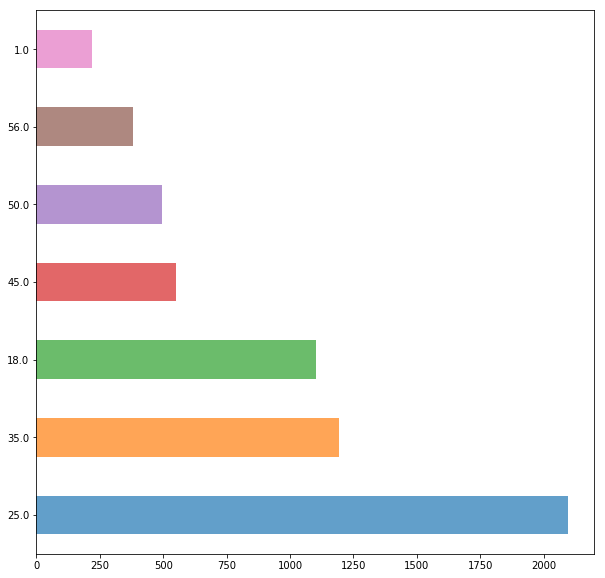

In [91]:
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

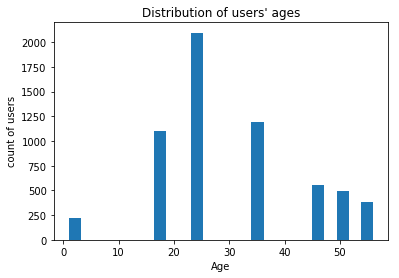

In [92]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

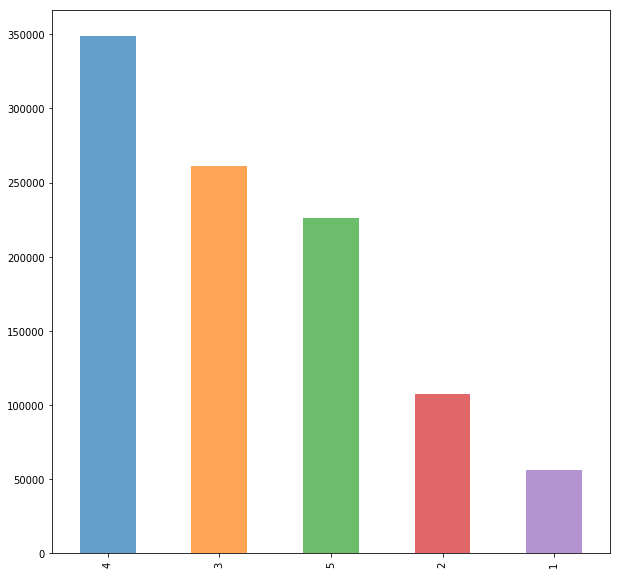

In [96]:
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [97]:
first_500 = df[500:]
first_500.dropna(inplace=True)

C:\Users\Deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
features = first_500[['MovieID','Age','Occupation']].values

In [99]:
labels = first_500[['Ratings']].values

In [100]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [101]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


32.98

In [102]:
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


96.42

In [103]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\Deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


57.57

In [104]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32.23

In [105]:
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32.49

In [106]:
linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


27.46

In [107]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

In [108]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\Deepa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


98.54

In [112]:
   models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
               'Linear SVC', 
              'Decision Tree'],'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
               acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
7,Decision Tree,98.54
0,Support Vector Machines,96.42
1,KNN,57.57
2,Logistic Regression,32.98
5,Perceptron,32.49
4,Naive Bayes,32.23
6,Linear SVC,27.46
